# ODL Examples
These are some selected examples. copied verbatim from https://github.com/odlgroup/odl/blob/master/examples/

## 2D Tomography with unfiltered backprojection

/home/w/wuebbel/.local/lib/python3.10/site-packages/odl/tomo/backends/skimage_radon.py:244: RuntimeWarning: The 'skimage' backend may be too slow for volumes of this size. Consider using 'astra_cpu', or 'astra_cuda' if your machine has an Nvidia GPU.
  warnings.warn(
/home/w/wuebbel/.local/lib/python3.10/site-packages/odl/discr/discr_utils.py:628: UserWarning: Unable to infer accurate dtype for interpolation coefficients, defaulting to `float`.
  warn("Unable to infer accurate dtype for"


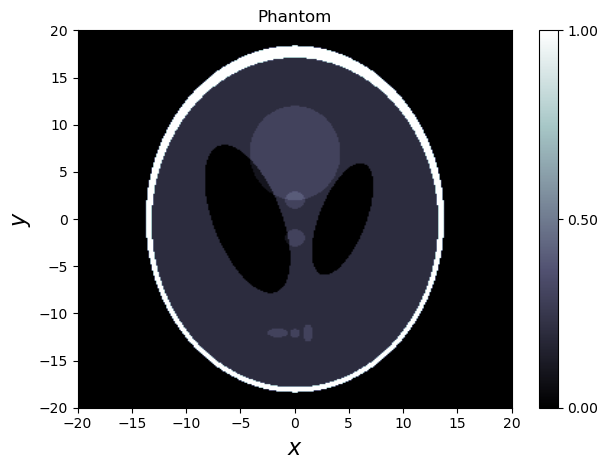

<Figure size 640x480 with 0 Axes>

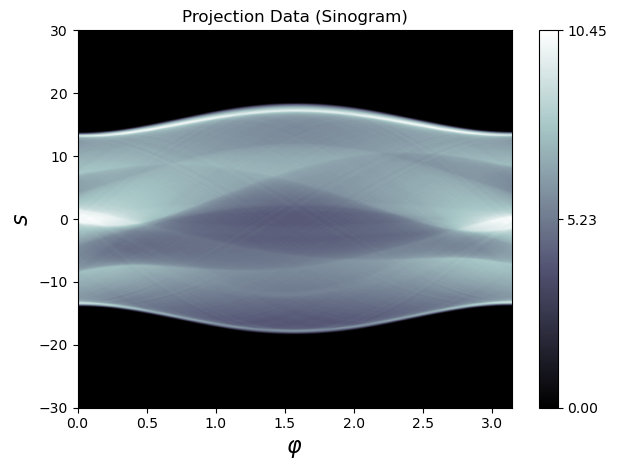

<Figure size 640x480 with 0 Axes>

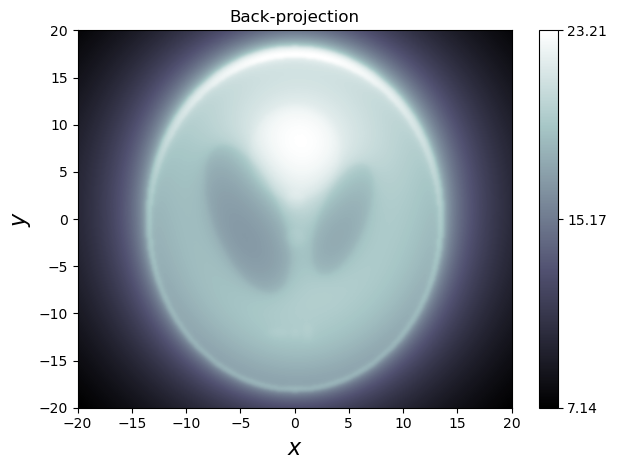

<Figure size 640x480 with 0 Axes>

In [2]:
"""Example using the ray transform with 2d parallel beam geometry."""

import numpy as np
import odl

# Reconstruction space: discretized functions on the rectangle
# [-20, 20]^2 with 300 samples per dimension.
reco_space = odl.uniform_discr(
    min_pt=[-20, -20], max_pt=[20, 20], shape=[300, 300], dtype='float32')

# Make a parallel beam geometry with flat detector
# Angles: uniformly spaced, n = 180, min = 0, max = pi
angle_partition = odl.uniform_partition(0, np.pi, 180)
# Detector: uniformly sampled, n = 512, min = -30, max = 30
detector_partition = odl.uniform_partition(-30, 30, 512)
geometry = odl.tomo.Parallel2dGeometry(angle_partition, detector_partition)

# Ray transform (= forward projection).
ray_trafo = odl.tomo.RayTransform(reco_space, geometry)

# Create a discrete Shepp-Logan phantom (modified version)
phantom = odl.phantom.shepp_logan(reco_space, modified=True)

# Create projection data by calling the ray transform on the phantom
proj_data = ray_trafo(phantom)

# Back-projection can be done by simply calling the adjoint operator on the
# projection data (or any element in the projection space).
backproj = ray_trafo.adjoint(proj_data)

# Shows a slice of the phantom, projections, and reconstruction
phantom.show(title='Phantom')
proj_data.show(title='Projection Data (Sinogram)')
backproj.show(title='Back-projection', force_show=True);

## 2D tomography with filtered backprojection

/home/w/wuebbel/.local/lib/python3.10/site-packages/odl/tomo/backends/skimage_radon.py:244: RuntimeWarning: The 'skimage' backend may be too slow for volumes of this size. Consider using 'astra_cpu', or 'astra_cuda' if your machine has an Nvidia GPU.
  warnings.warn(
/home/w/wuebbel/.local/lib/python3.10/site-packages/odl/discr/discr_utils.py:628: UserWarning: Unable to infer accurate dtype for interpolation coefficients, defaulting to `float`.
  warn("Unable to infer accurate dtype for"


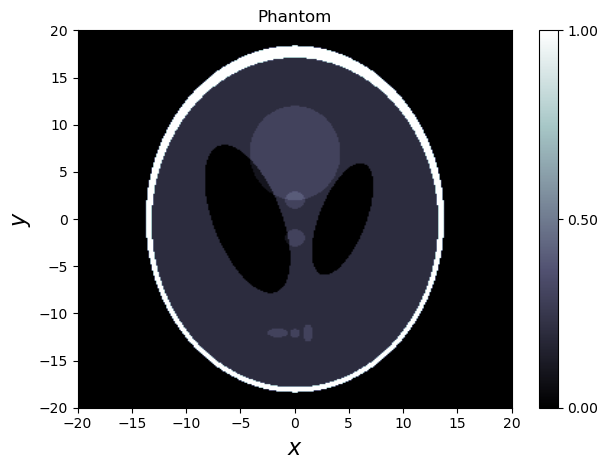

<Figure size 640x480 with 0 Axes>

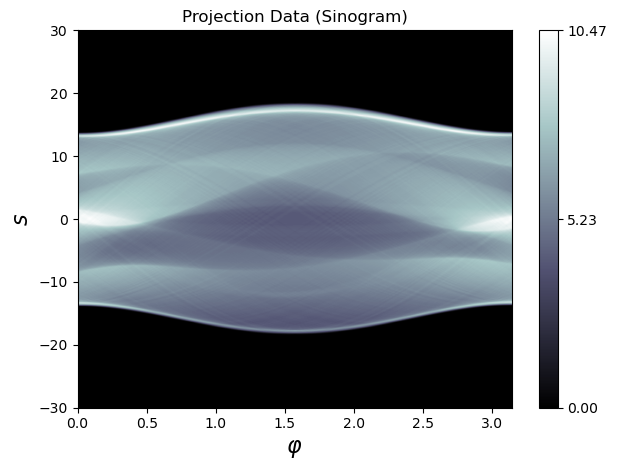

<Figure size 640x480 with 0 Axes>

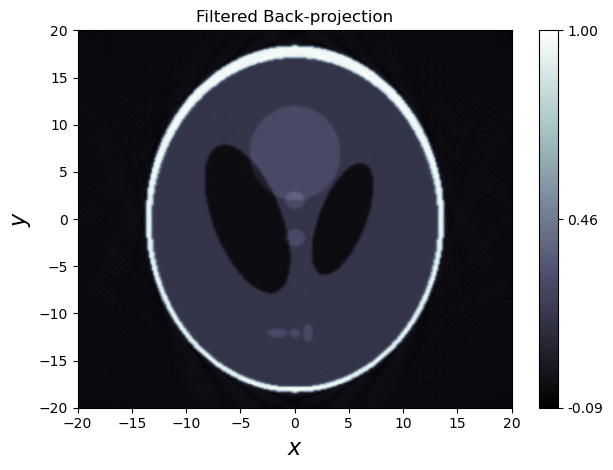

<Figure size 640x480 with 0 Axes>

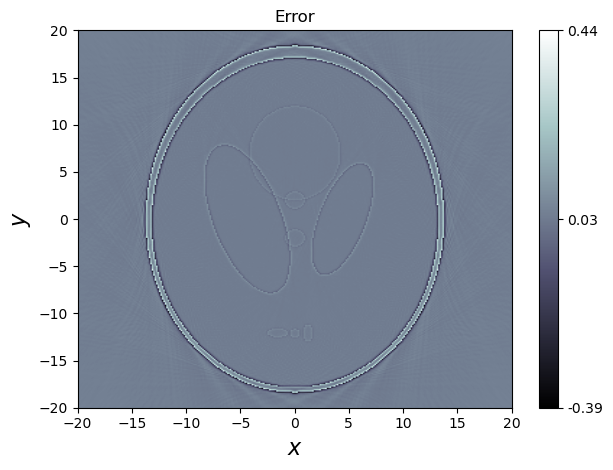

<Figure size 640x480 with 0 Axes>

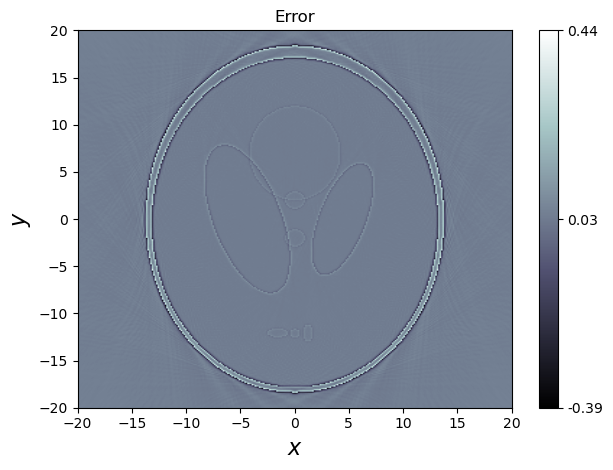

In [3]:
"""Example for reconstruction with FBP in 2d parallel geometry.

This example creates a filtered back-projection operator in 2d using the
ray transform and a ramp filter. This ramp filter is implemented in Fourier
space.

See https://en.wikipedia.org/wiki/Radon_transform#Inversion_formulas for
more information.

Also note that ODL has a utility function, `fbp_op` that can be used to
generate the FBP operator. This example is intended to show how the same
functionality could be implemented by hand in ODL.
"""

import numpy as np
import odl


# --- Set up geometry of the problem --- #


# Reconstruction space: discretized functions on the rectangle
# [-20, 20]^2 with 300 samples per dimension.
reco_space = odl.uniform_discr(
    min_pt=[-20, -20], max_pt=[20, 20], shape=[300, 300], dtype='float32')

# Angles: uniformly spaced, n = 1000, min = 0, max = pi
angle_partition = odl.uniform_partition(0, np.pi, 1000)

# Detector: uniformly sampled, n = 500, min = -30, max = 30
detector_partition = odl.uniform_partition(-30, 30, 500)

# Make a parallel beam geometry with flat detector
geometry = odl.tomo.Parallel2dGeometry(angle_partition, detector_partition)


# --- Create Filtered Back-projection (FBP) operator --- #


# Ray transform (= forward projection).
ray_trafo = odl.tomo.RayTransform(reco_space, geometry)

# Fourier transform in detector direction
fourier = odl.trafos.FourierTransform(ray_trafo.range, axes=[1])

# Create ramp in the detector direction
ramp_function = fourier.range.element(lambda x: np.abs(x[1]) / (2 * np.pi))

# Create ramp filter via the convolution formula with fourier transforms
ramp_filter = fourier.inverse * ramp_function * fourier

# Create filtered back-projection by composing the back-projection (adjoint)
# with the ramp filter.
fbp = ray_trafo.adjoint * ramp_filter


# --- Show some examples --- #


# Create a discrete Shepp-Logan phantom (modified version)
phantom = odl.phantom.shepp_logan(reco_space, modified=True)

# Create projection data by calling the ray transform on the phantom
proj_data = ray_trafo(phantom)

# Calculate filtered back-projection of data
fbp_reconstruction = fbp(proj_data)

# Shows a slice of the phantom, projections, and reconstruction
phantom.show(title='Phantom')
proj_data.show(title='Projection Data (Sinogram)')
fbp_reconstruction.show(title='Filtered Back-projection')
(phantom - fbp_reconstruction).show(title='Error', force_show=True)

## Full 2D Tomography problem with Total Variation regularization

/home/w/wuebbel/.local/lib/python3.10/site-packages/odl/tomo/backends/skimage_radon.py:244: RuntimeWarning: The 'skimage' backend may be too slow for volumes of this size. Consider using 'astra_cpu', or 'astra_cuda' if your machine has an Nvidia GPU.
  warnings.warn(
/home/w/wuebbel/.local/lib/python3.10/site-packages/odl/discr/discr_utils.py:628: UserWarning: Unable to infer accurate dtype for interpolation coefficients, defaulting to `float`.
  warn("Unable to infer accurate dtype for"


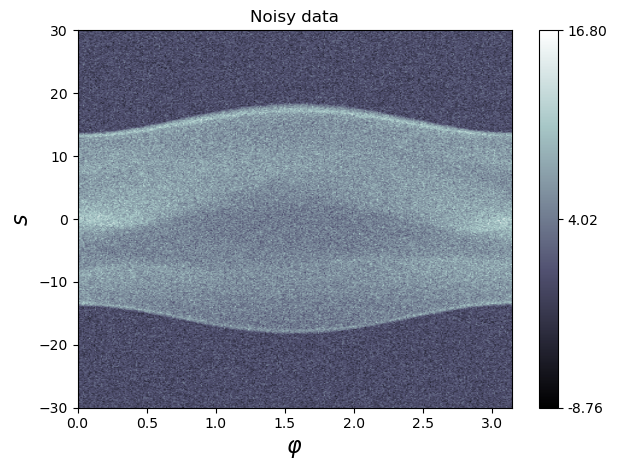

<Figure size 640x480 with 0 Axes>

/home/w/wuebbel/.local/lib/python3.10/site-packages/odl/discr/discr_utils.py:628: UserWarning: Unable to infer accurate dtype for interpolation coefficients, defaulting to `float`.
  warn("Unable to infer accurate dtype for"


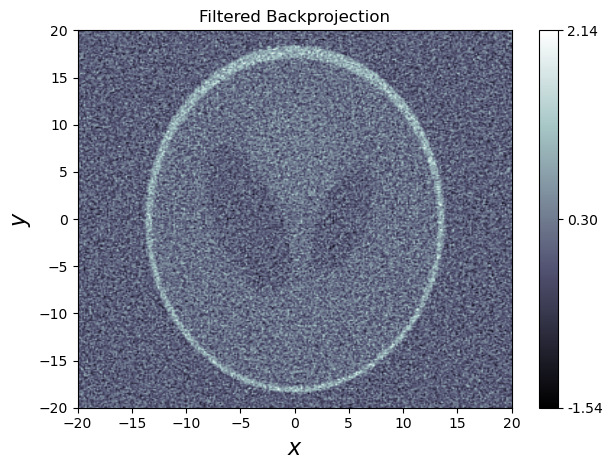

<Figure size 640x480 with 0 Axes>

/home/w/wuebbel/.local/lib/python3.10/site-packages/odl/discr/discr_utils.py:628: UserWarning: Unable to infer accurate dtype for interpolation coefficients, defaulting to `float`.
  warn("Unable to infer accurate dtype for"


iter = 0


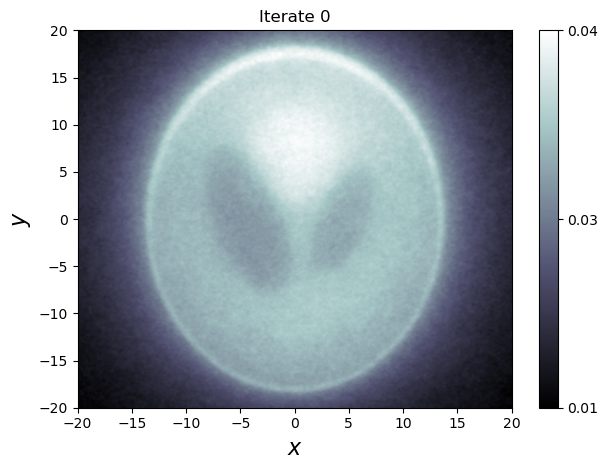

<Figure size 640x480 with 0 Axes>

/home/w/wuebbel/.local/lib/python3.10/site-packages/odl/discr/discr_utils.py:628: UserWarning: Unable to infer accurate dtype for interpolation coefficients, defaulting to `float`.
  warn("Unable to infer accurate dtype for"


iter = 10


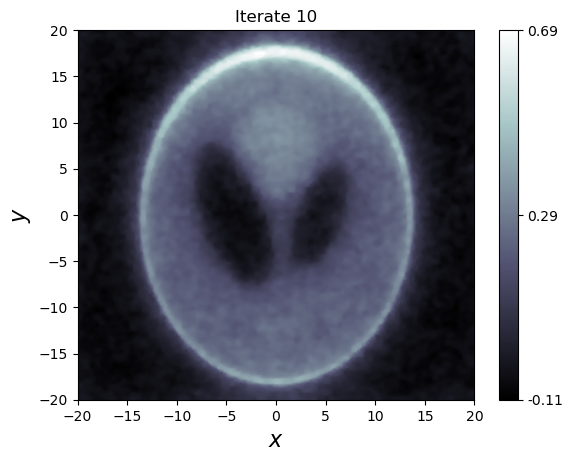

<Figure size 640x480 with 0 Axes>

/home/w/wuebbel/.local/lib/python3.10/site-packages/odl/discr/discr_utils.py:628: UserWarning: Unable to infer accurate dtype for interpolation coefficients, defaulting to `float`.
  warn("Unable to infer accurate dtype for"


iter = 20


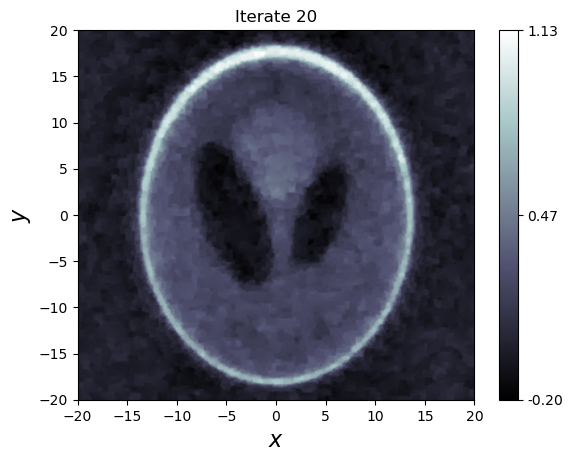

<Figure size 640x480 with 0 Axes>

/home/w/wuebbel/.local/lib/python3.10/site-packages/odl/discr/discr_utils.py:628: UserWarning: Unable to infer accurate dtype for interpolation coefficients, defaulting to `float`.
  warn("Unable to infer accurate dtype for"


iter = 30


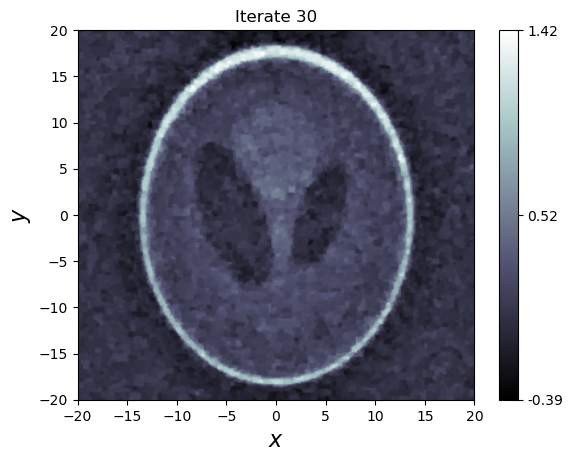

<Figure size 640x480 with 0 Axes>

/home/w/wuebbel/.local/lib/python3.10/site-packages/odl/discr/discr_utils.py:628: UserWarning: Unable to infer accurate dtype for interpolation coefficients, defaulting to `float`.
  warn("Unable to infer accurate dtype for"


iter = 40


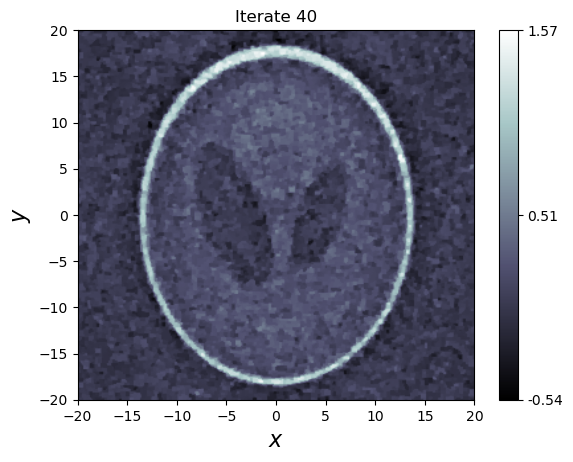

<Figure size 640x480 with 0 Axes>

/home/w/wuebbel/.local/lib/python3.10/site-packages/odl/discr/discr_utils.py:628: UserWarning: Unable to infer accurate dtype for interpolation coefficients, defaulting to `float`.
  warn("Unable to infer accurate dtype for"


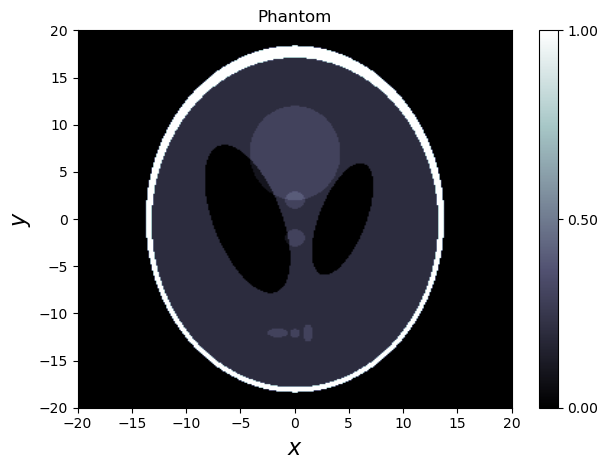

<Figure size 640x480 with 0 Axes>

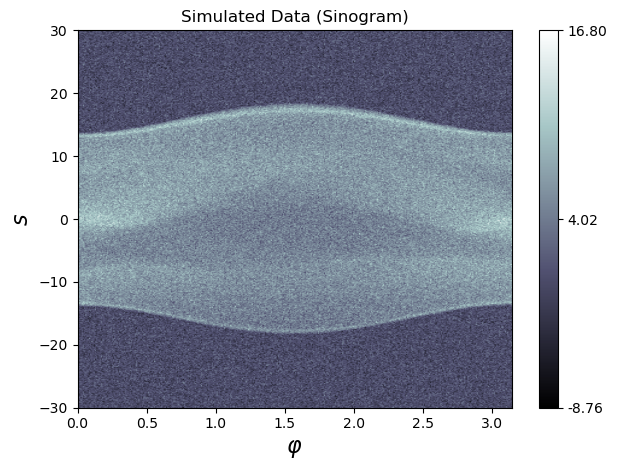

<Figure size 640x480 with 0 Axes>

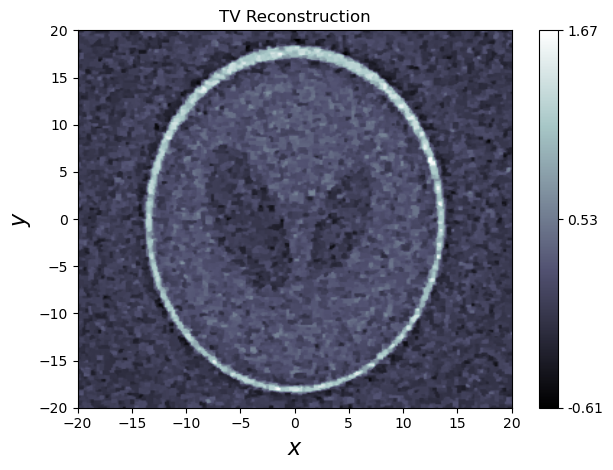

<Figure size 640x480 with 0 Axes>

In [14]:
"""Total variation tomography using PDHG.

Solves the optimization problem

    min_x  1/2 ||A(x) - g||_2^2 + lam || |grad(x)| ||_1

Where ``A`` is a parallel beam forward projector, ``grad`` the spatial
gradient and ``g`` is given noisy data.

For further details and a description of the solution method used, see
https://odlgroup.github.io/odl/guide/pdhg_guide.html in the ODL documentation.
"""

import numpy as np
import odl

# --- Set up the forward operator (ray transform) --- #

# Reconstruction space: discretized functions on the rectangle
# [-20, 20]^2 with 300 samples per dimension.
reco_space = odl.uniform_discr(
    min_pt=[-20, -20], max_pt=[20, 20], shape=[300, 300], dtype='float32')

# Make a parallel beam geometry with flat detector
# Angles: uniformly spaced, n = 360, min = 0, max = pi
angle_partition = odl.uniform_partition(0, np.pi, 360)
# Detector: uniformly sampled, n = 512, min = -30, max = 30
detector_partition = odl.uniform_partition(-30, 30, 512)
geometry = odl.tomo.Parallel2dGeometry(angle_partition, detector_partition)

# Create the forward operator
ray_trafo = odl.tomo.RayTransform(reco_space, geometry)

# --- Generate artificial data --- #

# Create phantom
discr_phantom = odl.phantom.shepp_logan(reco_space, modified=True)

# Create sinogram of forward projected phantom with noise
data = ray_trafo(discr_phantom)
data += odl.phantom.white_noise(ray_trafo.range) * np.mean(data) * 0.6
data.show(title='Noisy data')

# --- Set up the inverse problem --- #

# Initialize gradient operator
gradient = odl.Gradient(reco_space)

# Column vector of two operators
op = odl.BroadcastOperator(ray_trafo, gradient)

# Do not use the f functional, set it to zero.
f = odl.solvers.ZeroFunctional(op.domain)

# Create functionals for the dual variable

# l2-squared data matching
l2_norm = odl.solvers.L2NormSquared(ray_trafo.range).translated(data)

# Isotropic TV-regularization i.e. the l1-norm
l1_norm = 0.015 * odl.solvers.L1Norm(gradient.range)

# Combine functionals, order must correspond to the operator K
g = odl.solvers.SeparableSum(l2_norm, l1_norm)

# FBP
# Fourier transform in detector direction
fourier = odl.trafos.FourierTransform(ray_trafo.range, axes=[1])

# Create ramp in the detector direction
ramp_function = fourier.range.element(lambda x: np.abs(x[1]) / (2 * np.pi))

# Create ramp filter via the convolution formula with fourier transforms
ramp_filter = fourier.inverse * ramp_function * fourier

# Create filtered back-projection by composing the back-projection (adjoint)
# with the ramp filter.
fbp = ray_trafo.adjoint * ramp_filter

x_ftw=fbp(data)
x_ftw.show(title='Filtered Backprojection')

# --- Select solver parameters and solve using PDHG --- #

# Estimated operator norm, add 10 percent to ensure ||K||_2^2 * sigma * tau < 1
op_norm = 1.1 * odl.power_method_opnorm(op)

niter = 50  # Number of iterations
tau = 1.0 / op_norm  # Step size for the primal variable
sigma = 1.0 / op_norm  # Step size for the dual variable

# Optionally pass callback to the solver to display intermediate results
callback = (odl.solvers.CallbackPrintIteration(step=10) &
            odl.solvers.CallbackShow(step=10))

# Choose a starting point
x = op.domain.zero()


# Run the algorithm
odl.solvers.pdhg(x, f, g, op, niter=niter, tau=tau, sigma=sigma,
                 callback=callback)

# Display images
discr_phantom.show(title='Phantom')
data.show(title='Simulated Data (Sinogram)')
x.show(title='TV Reconstruction', force_show=True);

## Sparse Angle Tomography with TV and Douglas-Rachford

/home/w/wuebbel/.local/lib/python3.10/site-packages/odl/tomo/backends/skimage_radon.py:244: RuntimeWarning: The 'skimage' backend may be too slow for volumes of this size. Consider using 'astra_cpu', or 'astra_cuda' if your machine has an Nvidia GPU.
  warnings.warn(


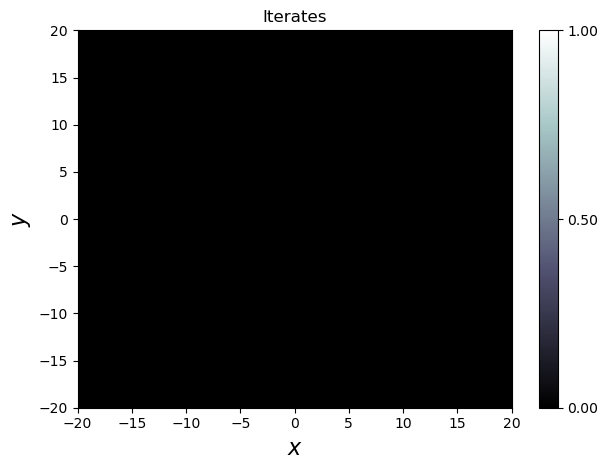

<Figure size 640x480 with 0 Axes>

iter = 0
iter = 1
iter = 2
iter = 3
iter = 4


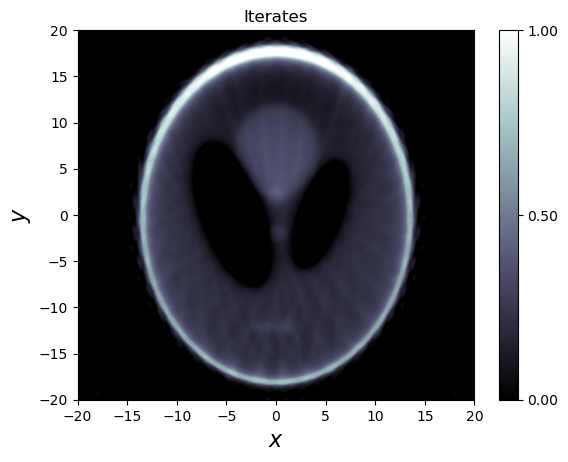

<Figure size 640x480 with 0 Axes>

iter = 5
iter = 6
iter = 7
iter = 8
iter = 9


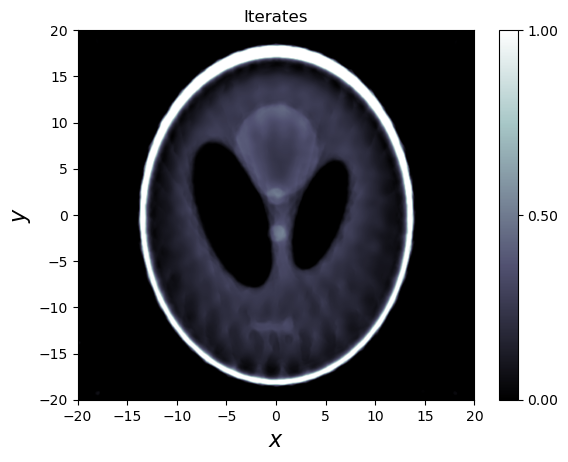

<Figure size 640x480 with 0 Axes>

iter = 10
iter = 11
iter = 12
iter = 13
iter = 14


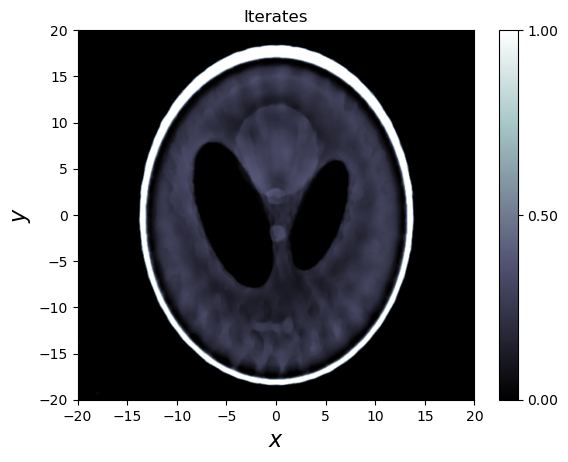

<Figure size 640x480 with 0 Axes>

iter = 15
iter = 16
iter = 17
iter = 18
iter = 19


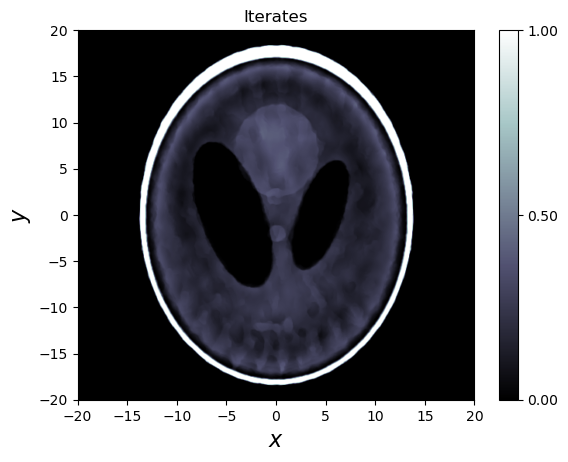

<Figure size 640x480 with 0 Axes>

iter = 20
iter = 21
iter = 22
iter = 23
iter = 24


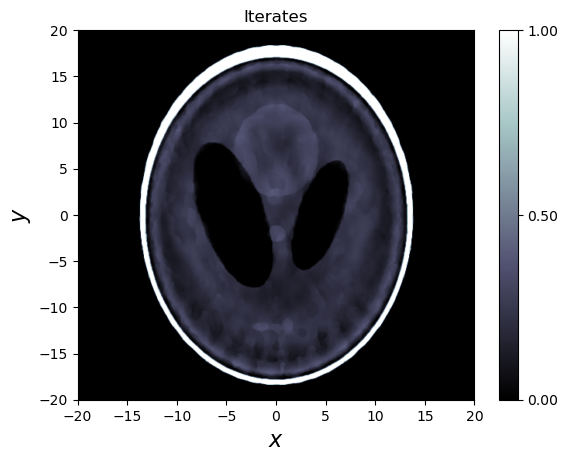

<Figure size 640x480 with 0 Axes>

iter = 25
iter = 26
iter = 27
iter = 28
iter = 29


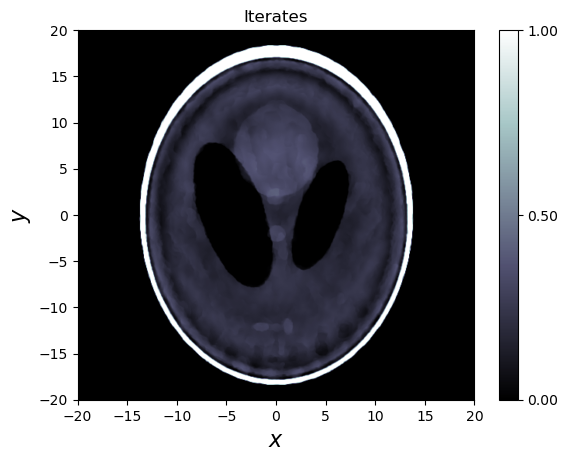

<Figure size 640x480 with 0 Axes>

iter = 30
iter = 31
iter = 32
iter = 33
iter = 34


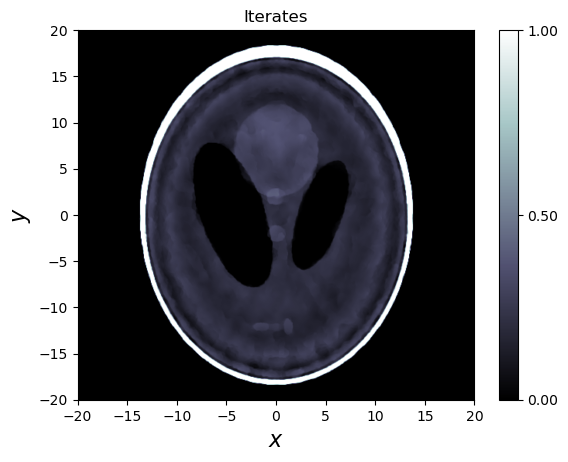

<Figure size 640x480 with 0 Axes>

iter = 35
iter = 36
iter = 37
iter = 38
iter = 39


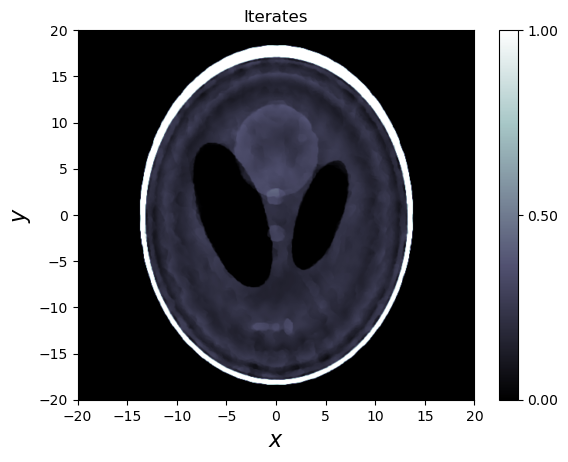

<Figure size 640x480 with 0 Axes>

iter = 40
iter = 41
iter = 42
iter = 43
iter = 44


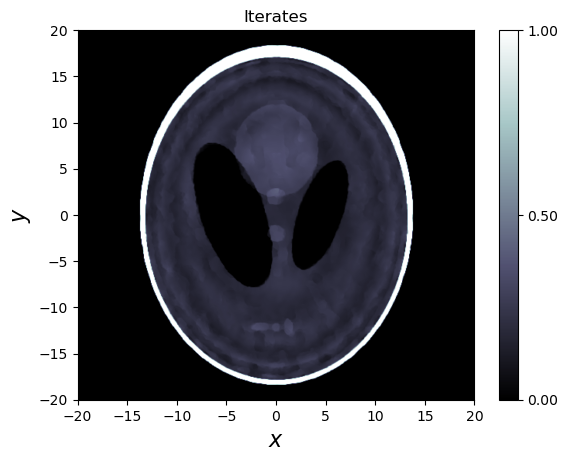

<Figure size 640x480 with 0 Axes>

iter = 45
iter = 46
iter = 47
iter = 48
iter = 49


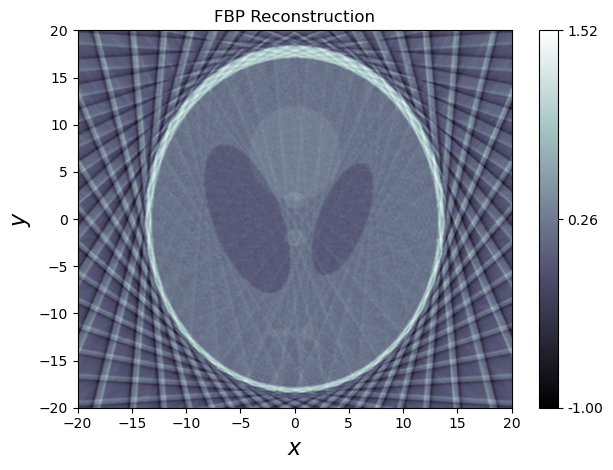

<Figure size 640x480 with 0 Axes>

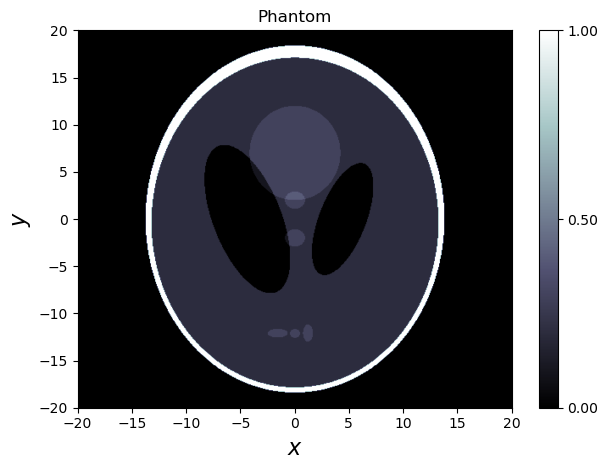

<Figure size 640x480 with 0 Axes>

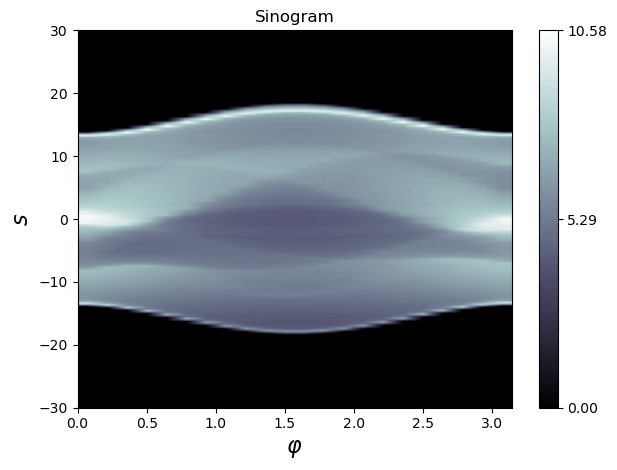

<Figure size 640x480 with 0 Axes>

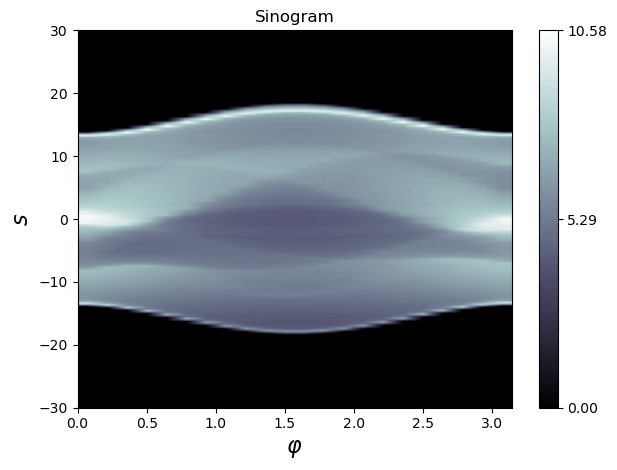

In [16]:
"""Total variation sparse angle tomography using the Douglas-Rachford solver.

Solves the optimization problem

    min_{0 <= x <= 1, Ax = g} lam ||grad(x)||_x

where ``A`` is ray transform operator, ``g`` the given noisy data, ``grad`` is
the spatial gradient and || . ||_x is the so called cross-norm, giving rise to
isotropic Total Variation.

This problem can be rewritten in the form

    min_{0 <= x <= 1} lam ||grad(x)||_x + I_{Ax = g}

where I_{.} is the indicator function, which is zero if ``Ax = g`` and infinity
otherwise. This is a standard convex optimization problem that can
be solved with the `douglas_rachford_pd` solver.

In this example, the problem is solved with only 22 angles available, which is
highly under-sampled data. Despite this, we get a perfect reconstruction.
A filtered back-projection (pseudoinverse) reconstruction is also shown at the
end for comparsion.

This is an implementation of the "puzzling numerical experiment" in the seminal
paper "Robust Uncertainty Principles: Exact Signal Reconstruction from Highly
Incomplete Frequency Information", Candes et. al. 2006.

Note that the ``Ax = g`` condition can be relaxed to ``||Ax - g|| <= eps``
for some small ``eps`` in order to account for noise. This can be done using
the `IndicatorLpUnitBall` functional instead of `IndicatorZero`.
"""

import numpy as np
import odl

# Parameters
lam = 0.01
data_matching = 'exact'

# --- Create spaces, forward operator and simulated data ---

# Reconstruction space: discretized functions on the rectangle
# [-20, 20]^2 with 512 samples per dimension.
space = odl.uniform_discr(min_pt=[-20, -20], max_pt=[20, 20], shape=[512, 512])

# Make a parallel beam geometry with flat detector
# Angles: uniformly spaced, n = 22, min = 0, max = pi
angle_partition = odl.uniform_partition(0, np.pi, 22)
# Detector: uniformly sampled, n = 512, min = -30, max = 30
detector_partition = odl.uniform_partition(-30, 30, 512)
geometry = odl.tomo.Parallel2dGeometry(angle_partition, detector_partition)

# Ray transform (= forward projection).
ray_trafo = odl.tomo.RayTransform(space, geometry)

# Create sinogram
phantom = odl.phantom.shepp_logan(space, modified=True)
data = ray_trafo(phantom)

# --- Create functionals for solving the optimization problem ---

# Gradient for TV regularization
gradient = odl.Gradient(space)

# Functional to enforce 0 <= x <= 1
f = odl.solvers.IndicatorBox(space, 0, 1)

if data_matching == 'exact':
    # Functional to enforce Ax = g
    # Due to the splitting used in the douglas_rachford_pd solver, we only
    # create the functional for the indicator function on g here, the forward
    # model is handled separately.
    indicator_zero = odl.solvers.IndicatorZero(ray_trafo.range)
    indicator_data = indicator_zero.translated(data)
elif data_matching == 'inexact':
    # Functional to enforce ||Ax - g||_2 < eps
    # We do this by rewriting the condition on the form
    # f(x) = 0 if ||A(x/eps) - (g/eps)||_2 < 1, infinity otherwise
    # That function (with A handled separately, as mentioned above) is
    # implemented in ODL as the IndicatorLpUnitBall function.
    # Note that we use right multiplication in order to scale in input argument
    # instead of the result of the functional, as would be the case with left
    # multiplication.
    eps = 5.0

    # Add noise to data
    raw_noise = odl.phantom.white_noise(ray_trafo.range)
    data += raw_noise * eps / raw_noise.norm()

    # Create indicator
    indicator_l2_ball = odl.solvers.IndicatorLpUnitBall(ray_trafo.range, 2)
    indicator_data = indicator_l2_ball.translated(data / eps) * (1 / eps)
else:
    raise RuntimeError('unknown data_matching')

# Functional for TV minimization
cross_norm = lam * odl.solvers.GroupL1Norm(gradient.range)

# --- Create functionals for solving the optimization problem ---

# Assemble operators and functionals for the solver
lin_ops = [ray_trafo, gradient]
g = [indicator_data, cross_norm]

# Create callback that prints the iteration number and shows partial results
callback = (odl.solvers.CallbackShow('Iterates', step=5, clim=[0, 1]) &
            odl.solvers.CallbackPrintIteration())

# Solve with initial guess x = 0.
# Step size parameters are selected to ensure convergence.
# See douglas_rachford_pd doc for more information.
x = ray_trafo.domain.zero()
odl.solvers.douglas_rachford_pd(x, f, g, lin_ops,
                                tau=0.1, sigma=[0.1, 0.02], lam=1.5,
                                niter=50, callback=callback)

# Compare with filtered back-projection
fbp_recon = odl.tomo.fbp_op(ray_trafo)(data)
fbp_recon.show('FBP Reconstruction')
phantom.show('Phantom')
data.show('Sinogram', force_show=True)

In [17]:
from scipy.io import savemat

# Convert the ODL element to a NumPy array
matrix_np = fbp_recon.asarray()

# Save the NumPy array to a .mat file
savemat('matrix_data.mat', {'matrix': matrix_np})